In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("dataset", sep='\t')

In [3]:
dataset

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will Ì? b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
dataset['label'] 

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: label, Length: 5574, dtype: int64

In [7]:
dataset

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will Ì? b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

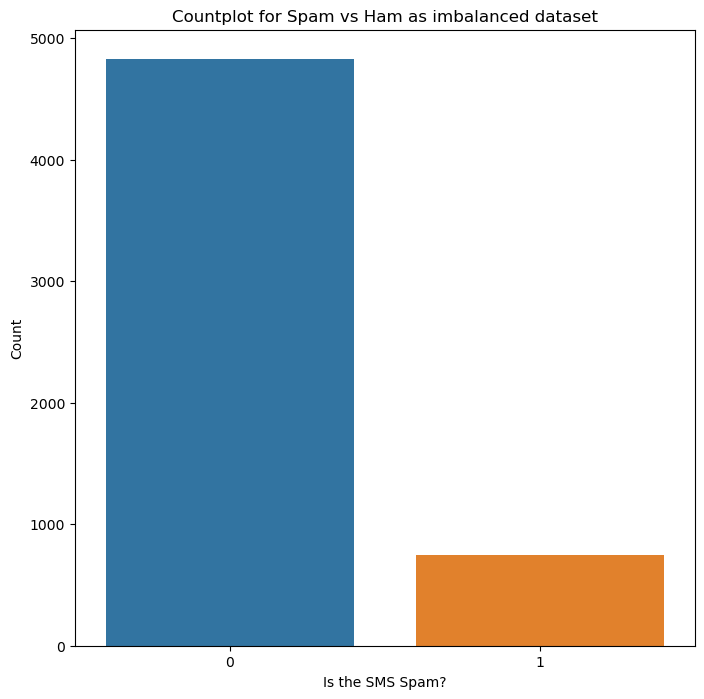

In [9]:
plt.figure(figsize=(8,8))
g= sns.countplot(x="label", data=dataset)
p= plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')


In [10]:
only_spam = dataset[dataset["label"]==1]

In [11]:
only_spam

,sms,label
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,FreeMsg Hey there darling it's been 3 week's n...,1
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1
11,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [12]:
print('No.of Spam SMS:', len(only_spam))
print('No.of Ham SMS:', len(dataset)-len(only_spam))


No.of Spam SMS: 747
No.of Ham SMS: 4827


In [13]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])

In [14]:
count

6

In [15]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])
    
dataset.shape

(9309, 2)

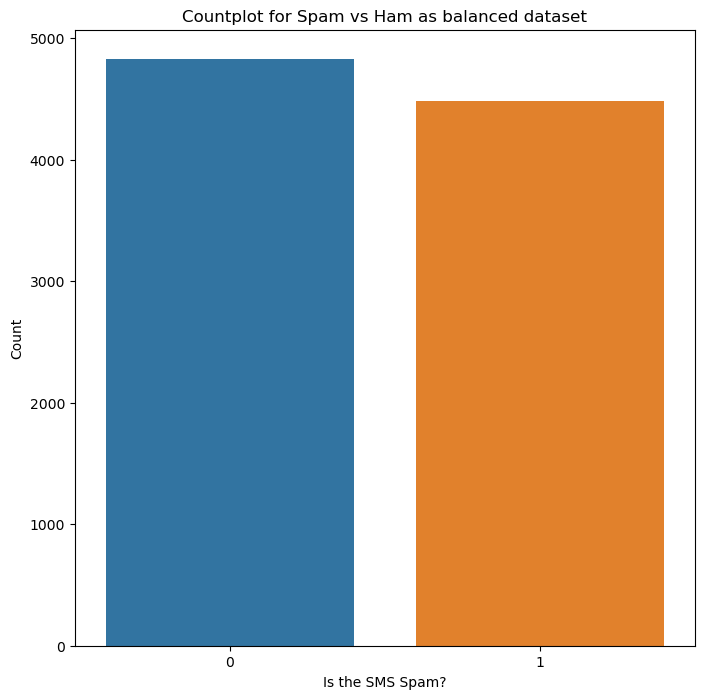

In [16]:
plt.figure(figsize=(8,8))
g= sns.countplot(x="label", data=dataset)
p= plt.title('Countplot for Spam vs Ham as balanced dataset')
p=plt.xlabel('Is the SMS Spam?')
p=plt.ylabel('Count')


In [17]:
dataset['word_count']=dataset['sms'].apply(lambda x: len(x.split()))

In [18]:
dataset

,sms,label,word_count
0,"Go until jurong point, crazy.. Available only ...",0,20
1,Ok lar... Joking wif u oni...\n,0,6
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,U dun say so early hor... U c already then say...,0,11
4,"Nah I don't think he goes to usf, he lives aro...",0,13
...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28


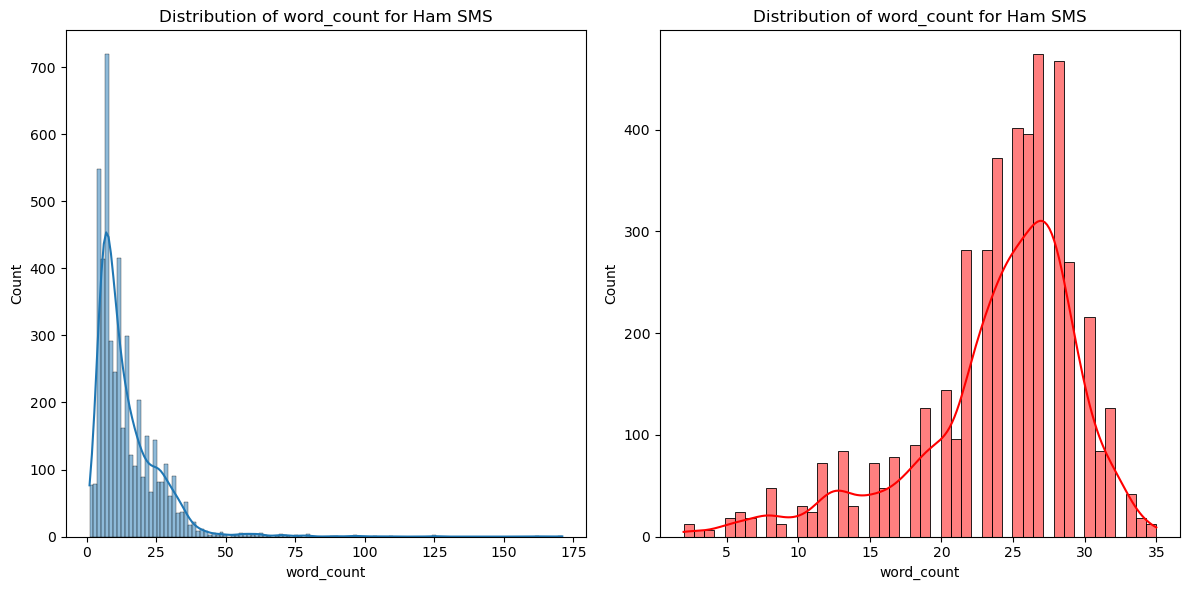

In [19]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["label"]==0].word_count, kde=True)
p=plt.title('Distribution of word_count for Ham SMS')

plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["label"]==1].word_count, color="red", kde=True)
p=plt.title('Distribution of word_count for Ham SMS')

plt.tight_layout()
plt.show()

In [20]:
def currency(data):
    currency_symbols=['€','$','¥','£','₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [21]:
dataset["contains_currency_symbols"]=dataset["sms"].apply(currency)

In [22]:
dataset

,sms,label,word_count,contains_currency_symbols
0,"Go until jurong point, crazy.. Available only ...",0,20,0
1,Ok lar... Joking wif u oni...\n,0,6,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0
3,U dun say so early hor... U c already then say...,0,11,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0
...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0


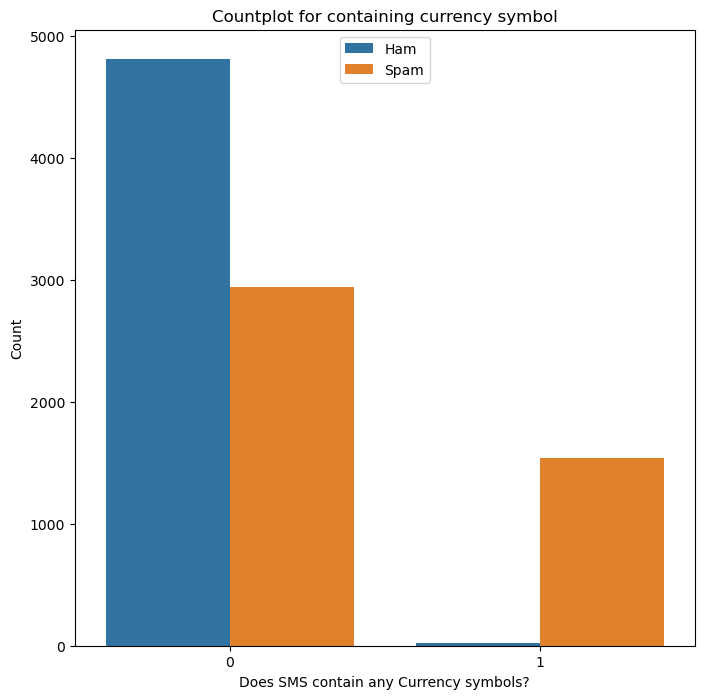

In [23]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_currency_symbols', data=dataset, hue="label")
p=plt.title('Countplot for containing currency symbol')
p=plt.xlabel('Does SMS contain any Currency symbols?')
p=plt.ylabel('Count')
p=plt.legend(labels=["Ham","Spam"], loc=9)

In [24]:
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [25]:
dataset["contains_numbers"]= dataset["sms"].apply(number)

In [26]:
dataset

,sms,label,word_count,contains_currency_symbols,contains_numbers
0,"Go until jurong point, crazy.. Available only ...",0,20,0,0
1,Ok lar... Joking wif u oni...\n,0,6,0,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0,1
3,U dun say so early hor... U c already then say...,0,11,0,0
4,"Nah I don't think he goes to usf, he lives aro...",0,13,0,0
...,...,...,...,...,...
5539,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0,1
5542,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1,1
5549,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0,1
5568,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0,1


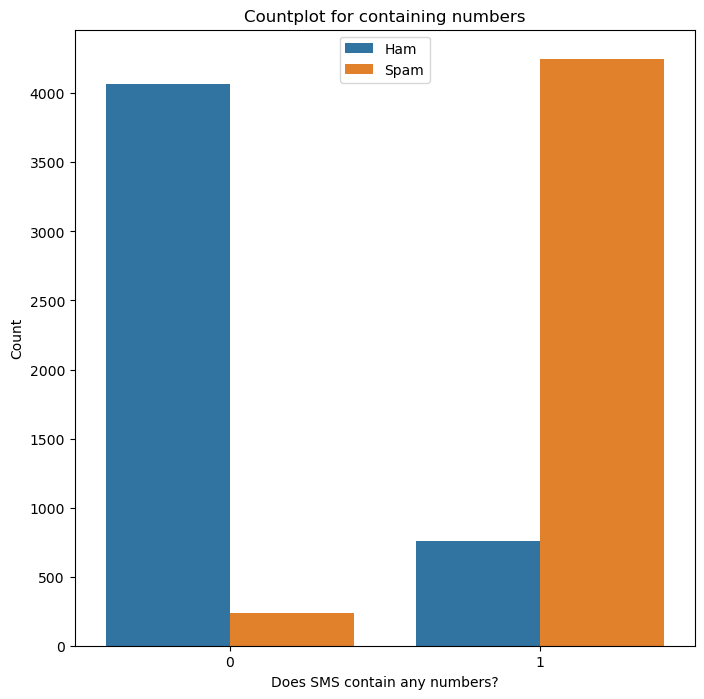

In [27]:
plt.figure(figsize=(8,8))
g=sns.countplot(x='contains_numbers', data=dataset, hue="label")
p=plt.title('Countplot for containing numbers')
p=plt.xlabel('Does SMS contain any numbers?')
p=plt.ylabel('Count')
p=plt.legend(labels=["Ham","Spam"], loc=9)

In [29]:
pip install corpus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install corpus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install stopwords

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [34]:
import re
import nltk
import string

In [35]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [39]:
import nltk
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SRI
[nltk_data]     NIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to C:\Users\SRI
[nltk_data]     NIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SRI
[nltk_data]     NIDHI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [46]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\SRI
[nltk_data]     NIDHI\AppData\Roaming\nltk_data...


True

In [42]:
corpus = []
wnl=WordNetLemmatizer()

for SMS in list(dataset.sms):
    sms = re.sub(pattern='[^a-zA-Z]', repl=' ', string=SMS)
    sms = sms.lower()
    words = sms.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    sms = ' '.join(lemm_words)
    
    corpus.append(sms)

In [43]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [44]:
pip install TfidfVectorizer

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement TfidfVectorizer (from versions: none)
ERROR: No matching distribution found for TfidfVectorizer


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()    

In [46]:
X = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [47]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [49]:
X_train

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
2362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring ='f1', cv = 10)
print(mnb)
print(cv.std)

MultinomialNB()
<built-in method std of numpy.ndarray object at 0x00000167463FF0F0>


In [51]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring ='f1', cv = 10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.943
0.004


In [52]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       954
           1       0.94      0.93      0.94       908

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [54]:
cm = confusion_matrix(y_test, y_pred)

In [55]:
cm

array([[900,  54],
       [ 62, 846]], dtype=int64)

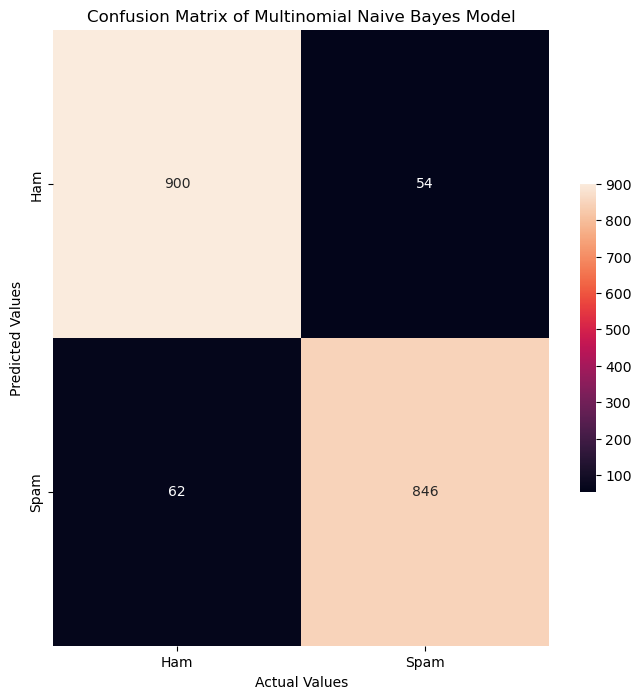

In [56]:
plt.figure(figsize=(8,8))
axis_labels=['Ham', 'Spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink":0.5})
p=plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))

0.943
0.004


In [58]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

In [59]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       954
           1       0.97      0.99      0.98       908

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [60]:
cm = confusion_matrix(y_test, y_pred1)
cm

array([[924,  30],
       [  5, 903]], dtype=int64)

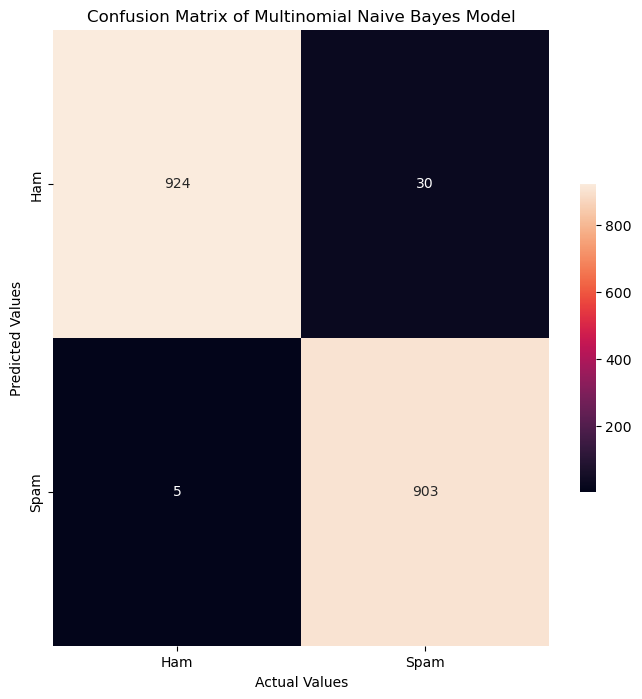

In [61]:
plt.figure(figsize=(8,8))
axis_labels=['Ham', 'Spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt = 'g', cbar_kws = {"shrink":0.5})
p=plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p=plt.xlabel('Actual Values')
p=plt.ylabel('Predicted Values')

In [62]:
def predict_spam(SMS):
    sms = re.sub(pattern='[^a-zA-Z]', repl=' ', string=SMS)
    sms = sms.lower()
    words = sms.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    sms = ' '.join(lemm_words)
    temp = tfidf.transform({sms}).toarray()
    return dt.predict(temp)

In [63]:
sample_sms = 'IMPORTANT = You could be entitled upto ₹9000 in compensation from mts sold PP1on a credit card or loan. Please reply PPI or STOP.'
if  predict_spam(sample_sms):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (Normal) message.')


Gotcha! This is a SPAM message.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [64]:
sample_sms2 = 'Good Morning Beautifull!'
if  predict_spam(sample_sms2):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (Normal) message.')

This is a HAM (Normal) message.


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
